In [2]:
import wrds
import numpy as np
from pandas import DataFrame
import pandas as pd

In [5]:
with wrds.Connection(wrds_username="mayurankv") as db:
	query = """
	SELECT *
	FROM crsp_a_treasuries.bmyield
	"""

	test = db.raw_sql(query)

/Users/mayurankv/Documents/Mayuran/Programming/Projects/Academic/Imperial College London/MSc Statistics/Dissertation/.venv/lib/python3.12/site-packages/wrds/sql.py:222: SyntaxWarning: invalid escape sequence '\p'
  """
/Users/mayurankv/Documents/Mayuran/Programming/Projects/Academic/Imperial College London/MSc Statistics/Dissertation/.venv/lib/python3.12/site-packages/wrds/sql.py:248: SyntaxWarning: invalid escape sequence '\p'
  """
/Users/mayurankv/Documents/Mayuran/Programming/Projects/Academic/Imperial College London/MSc Statistics/Dissertation/.venv/lib/python3.12/site-packages/wrds/sql.py:297: SyntaxWarning: invalid escape sequence '\:'
  passwd = passwd.replace(":", "\:")
/Users/mayurankv/Documents/Mayuran/Programming/Projects/Academic/Imperial College London/MSc Statistics/Dissertation/.venv/lib/python3.12/site-packages/wrds/sql.py:308: SyntaxWarning: invalid escape sequence '\:'
  oldline = line.replace("""\:""", "##COLON##")


KeyboardInterrupt: 

In [ ]:
test

,crspid,qdate,accint,yield,retnua,duratn
0,19610622.800000,1961-06-14,0.000000,0.00005,-99.0000,8.0
1,19610622.800000,1961-06-15,0.000000,0.00005,0.0001,7.0
2,19610622.800000,1961-06-16,0.000000,0.00005,0.0000,6.0
3,19610622.800000,1961-06-19,0.000000,0.00006,0.0001,3.0
4,19610622.800000,1961-06-20,0.000000,0.00006,0.0001,2.0
...,...,...,...,...,...,...
392687,20441115.103000,2014-12-24,0.306630,0.00008,0.0036,7328.6
392688,20441115.103000,2014-12-26,0.323204,0.00008,0.0033,7333.0
392689,20441115.103000,2014-12-29,0.348066,0.00008,0.0091,7347.8
392690,20441115.103000,2014-12-30,0.356354,0.00007,0.0032,7353.1


In [ ]:
with wrds.Connection(wrds_username="mayurankv") as db:
	query = """
	SELECT *
	FROM optionm_all.zerocd
	WHERE date >= '2015-01-01'
	"""

	test2 = db.raw_sql(query)

assert isinstance(test2, DataFrame)
test2["date"] = test2["date"].astype(str)
test2 = test2.set_index(["date", "days"])

In [ ]:
a = np.timedelta64(365, "D") / np.timedelta64(1, "D") * 0.22121
a
# a.astype("timedelta64[h]").astype(float) / 24

80.74164999999999

In [5]:
path: str = "../modules/stochastic_volatility_models/stochastic_volatility_models/data/rates.csv"
test2 = pd.read_csv(
	path,
	index_col=[0, 1],
)

In [3]:
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline


def plot_fit_curve(date: str, expiries=np.array([])):
	print(expiries * 365)
	assert isinstance(test2, DataFrame)
	df = test2.xs(date, level=0)

	# curve, status = calibrate_nss_ols(
	# 	t=df.index.values,
	# 	y=df["rate"].to_numpy(),
	# )
	cs = CubicSpline(
		df.index.values,
		df["rate"].to_numpy(),
		bc_type="natural",
	)
	risk_free_interest_rate = cs(expiries * 365) / 100

	plt.plot(df.index, df["rate"], marker="x", label=f"{date}")
	plt.plot(expiries * 365, risk_free_interest_rate * 100, linestyle="", marker="o")
	plt.plot(df.index, df["rate"], marker="x", color="grey")
	t = np.linspace(start=1, stop=df.index.max(), num=10000)
	# t2 = np.linspace(start=30, stop=df.index.max(), num=1000)
	plt.plot(t, cs(t), label=f"{date}")
	print(cs(expiries * 365) / 100)
	print(expiries * 365)
	# plt.plot(t2, curve(t2), label="nss")
	plt.legend()

[19.9999998  26.999999   28.99999825 36.0000011 ]
[0.00465375 0.00480468 0.00484771 0.0049979 ]
[19.9999998  26.999999   28.99999825 36.0000011 ]


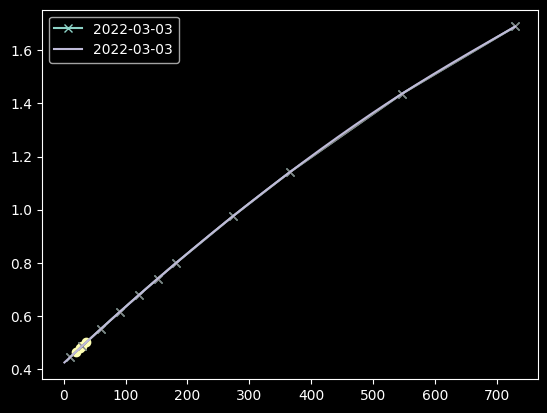

In [12]:
time = np.datetime64("2022-03-03")
plot_fit_curve(np.datetime_as_string(time), np.array([0.05479452, 0.0739726, 0.07945205, 0.09863014]))

In [ ]:
test2.xs(np.datetime_as_string(time), level=0)

In [19]:
from stochastic_volatility_models.src.data.rates import get_risk_free_interest_rate
import numpy as np

get_risk_free_interest_rate(time=np.datetime64("2020-01-02"), time_to_expiry=np.array([0.0410958904109589]))

2024-07-29 21:22:38.335 | INFO     | stochastic_volatility_models.config:initialise:30 - Loaded module `stochastic_volatility_models` from project directory path `/Users/mayurankv/Documents/Mayuran/Programming/Projects/Academic/Imperial College London/MSc Statistics/Dissertation/Project/modules`


array([0.01662256])